# CA 3 - Abriendo la Caja Negra

## Integrantes

- Carlos Raith Bravo Valdivia

- Luis Anthony Romero Padilla

- Jesus Valentin Niño Castañeda

- Diana  Prissyl Chavez Alarcon

Este conjunto de datos proviene de un caso de negocio en telecomunicaciones (IBM sample dataset).  
Cada fila corresponde a un cliente, y cada columna describe atributos relevantes de su perfil, servicios contratados y facturación.

**Columnas principales:**
- **Churn**: variable objetivo (si el cliente abandonó: Yes/No).
- **Datos demográficos**: `gender`, `SeniorCitizen`, `Partner`, `Dependents`.
- **Servicios**: `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`.
- **Cuenta/contrato**: `tenure`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`.

📍 Objetivo:  **predecir el churn** y, más importante, **explicar las razones** para que la empresa diseñe campañas de retención.


## 📊 Exploratory Data Analysis (EDA)

### 1. Tamaño del dataset y columnas

In [10]:
import pandas as pd

# Cargar el CSV en un DataFrame
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Dimensiones y nombres de columnas
df.shape, df.columns.tolist()

((7043, 21),
 ['customerID',
  'gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'tenure',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'MonthlyCharges',
  'TotalCharges',
  'Churn'])

### 2. Distribución de la variable objetivo (`Churn`)


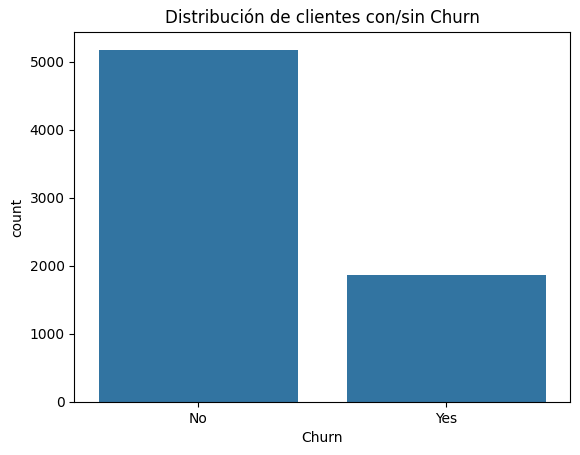

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de churn
sns.countplot(x="Churn", data=df)
plt.title("Distribución de clientes con/sin Churn")
plt.show()

# Porcentajes
df["Churn"].value_counts(normalize=True) * 100

Esto implica que el dataset presenta un **desbalance de clases**:  hay casi tres veces más clientes que permanecen que los que se van.  

**Implicación para el modelado:**  
Si se entrena un modelo sin tener en cuenta este desbalance, podría predecir siempre "No churn" y aún así alcanzar más del 70% de accuracy.  
Por ello, será importante usar métricas adicionales (recall, precision, F1, ROC-AUC) y aplicar técnicas de balanceo (SMOTE, class weights, etc.).

### 3. Valores faltantes


In [34]:
# Conteo de nulos por columna
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Al revisar el dataset encontramos **11 valores nulos en la columna `TotalCharges`**. 
Revisamos si existen clientes con `tenure = 0` que tengan cargos en `TotalCharges`. En teoría, estos deberían ser 0 porque no han cumplido ni un mes de servicio.

In [46]:
# Filtrar filas donde TotalCharges es nulo
df[df["TotalCharges"].isnull()][["customerID", "tenure", "TotalCharges"]]

,customerID,tenure,TotalCharges
488,4472-LVYGI,0,NaN
753,3115-CZMZD,0,NaN
936,5709-LVOEQ,0,NaN
1082,4367-NUYAO,0,NaN
1340,1371-DWPAZ,0,NaN
3331,7644-OMVMY,0,NaN
3826,3213-VVOLG,0,NaN
4380,2520-SGTTA,0,NaN
5218,2923-ARZLG,0,NaN
6670,4075-WKNIU,0,NaN


In [55]:
# Filtrar registros con tenure = 0
df[df["tenure"] == 0][["customerID", "tenure", "MonthlyCharges", "TotalCharges"]].head(20)

,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,NaN
753,3115-CZMZD,0,20.25,NaN
936,5709-LVOEQ,0,80.85,NaN
1082,4367-NUYAO,0,25.75,NaN
1340,1371-DWPAZ,0,56.05,NaN
3331,7644-OMVMY,0,19.85,NaN
3826,3213-VVOLG,0,25.35,NaN
4380,2520-SGTTA,0,20.00,NaN
5218,2923-ARZLG,0,19.70,NaN
6670,4075-WKNIU,0,73.35,NaN


Al filtrarlos, observamos que en todos esos casos el campo `tenure` es igual a 0.

📌 **Interpretación de `tenure`**: representa el número de meses que un cliente lleva con la compañía.  
- `tenure = 0` → cliente recién adquirido (aún no ha cumplido un mes).  
- `tenure > 0` → meses de permanencia con el servicio.

En consecuencia, los clientes con `tenure = 0` no deberían tener cargos acumulados, por lo que **el valor correcto de `TotalCharges` en esos casos es 0**.  

#### Estrategia
En lugar de eliminar estos registros, imputaremos los valores nulos de `TotalCharges` con 0, ya que es consistente con la lógica de negocio y nos permite conservar todas las observaciones del dataset.

In [61]:
# Convertir a numérico y rellenar NaN con 0
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(0, inplace=True)

# Verificar
df.loc[df["tenure"] == 0, ["customerID", "tenure", "TotalCharges"]].head(10);

,customerID,tenure,TotalCharges
488,4472-LVYGI,0,0.0
753,3115-CZMZD,0,0.0
936,5709-LVOEQ,0,0.0
1082,4367-NUYAO,0,0.0
1340,1371-DWPAZ,0,0.0
3331,7644-OMVMY,0,0.0
3826,3213-VVOLG,0,0.0
4380,2520-SGTTA,0,0.0
5218,2923-ARZLG,0,0.0
6670,4075-WKNIU,0,0.0


### 4. Tipos de variables

In [64]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

La mayoría de las variables aparecen como `object`, lo cual significa que son variables categóricas.  
En etapas posteriores, para poder calcular **correlaciones** y entrenar modelos de Machine Learning, será necesario **codificar estas variables** (por ejemplo, con *Label Encoding* o *One-Hot Encoding*).  
Esto permitirá convertirlas a valores numéricos sin perder la información de las categorías.

# Gráficos

### Correlaciones con la variable objetivo (Churn)

Primero convertimos las variables categóricas a numéricas usando **Label Encoding**, 
para que todas quedaran en formato adecuado para cálculos de correlación y modelos.  

Luego calculamos la correlación de cada variable con `Churn_Yes` y la mostramos 
en un gráfico de barras, lo que permite identificar rápidamente cuáles variables 
están más asociadas al abandono de clientes.

In [106]:
from sklearn.preprocessing import LabelEncoder

# Crear dataset de trabajo eliminando customerID
df_model = df.drop(columns=["customerID"]).copy()

# Aplicar Label Encoding a todas las columnas categóricas
label_encoders = {}
for col in df_model.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # guardar encoder si se quiere invertir la transformación

/tmp/ipykernel_62/3472815138.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="coolwarm");


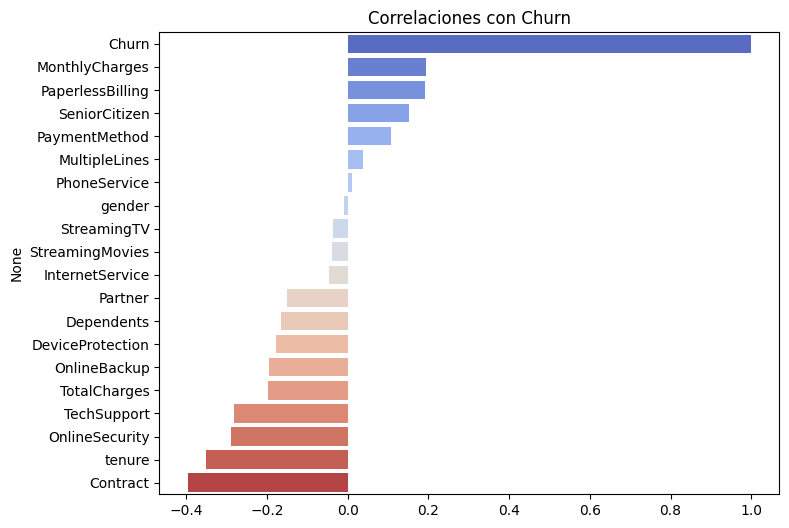

In [109]:
# Correlaciones con Churn
corr_matrix = df_model.corr()
churn_corr = corr_matrix["Churn"].sort_values(ascending=False);

plt.figure(figsize=(8,6))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="coolwarm");
plt.title("Correlaciones con Churn");
plt.show();

## Interpretación de correlaciones con Churn

El gráfico muestra la relación de cada variable con la probabilidad de abandono (`Churn`):

-  **Correlaciones positivas (mayor churn):**
  - `MonthlyCharges`: a mayor cargo mensual, mayor tendencia a que el cliente se vaya.
  - `PaperlessBilling`: clientes con facturación electrónica tienden a abandonar más.
  - `SeniorCitizen`: los adultos mayores presentan algo más de churn.
  - Algunos métodos de pago (`PaymentMethod`) también aparecen asociados al abandono.

-  **Correlaciones negativas (menor churn):**
  - `tenure`: cuanto más tiempo lleva el cliente, menos probabilidad de abandono.
  - `Contract`: contratos de 1 o 2 años reducen significativamente el churn frente a los contratos mes a mes.
  - `TotalCharges`: valores acumulados más altos se relacionan con mayor permanencia.
  - Servicios adicionales como `TechSupport` y `OnlineSecurity` también se asocian con menor churn.

-  **Variables neutras:**  
  Variables como `gender`, `PhoneService`, `StreamingTV`, `StreamingMovies` muestran correlaciones muy bajas, indicando que no son determinantes para explicar el abandono.

 **Conclusión:**  
Los factores más relevantes para explicar el churn son el **tipo de contrato y la permanencia (tenure)**, además de la **carga mensual y el método de pago**.  
Esto sugiere que estrategias de retención deberían enfocarse en **incentivar contratos de largo plazo**, **gestionar los cargos mensuales** y **prestar especial atención a clientes con facturación electrónica o fibra óptica**.


### Distribución de `tenure` por Churn

La variable `tenure` (meses de permanencia) es una de las más relevantes.  
La correlación negativa mostraba que a mayor tiempo en la compañía, menor churn.  
Graficarlo permite confirmar si los clientes que recién ingresan tienden a irse más.

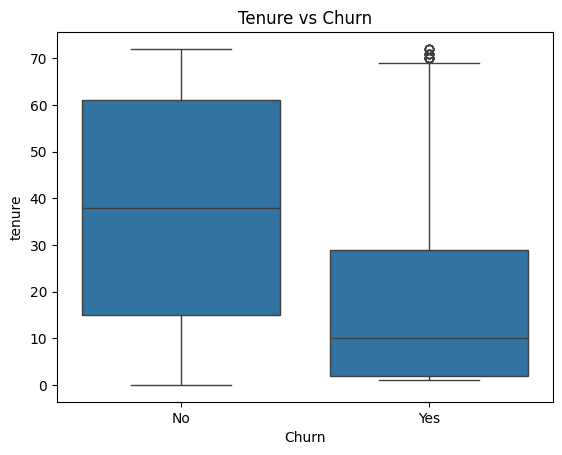

In [112]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

El boxplot confirma que:

- Los clientes que **se quedan** (`Churn = No`) tienen en promedio un `tenure` 
  (meses de permanencia) mucho más alto, con una mediana cercana a los **35–40 meses**.
- Los clientes que **se van** (`Churn = Yes`) muestran un `tenure` mucho más bajo, 
  con una mediana cercana a **10 meses**.
- Se observan algunos casos de churn con `tenure` alto, pero son minoría (outliers).

📌 **Insight clave:**  
El abandono ocurre mayormente en los primeros meses de contrato.  
Esto indica que la empresa debería enfocar sus estrategias de retención en **clientes nuevos (menos de 1 año)**, ya que son los que más riesgo tienen de irse.

### Contrato vs Churn

El tipo de contrato (`Contract`) también mostró fuerte relación negativa.  
Hipótesis: los clientes con contrato mes a mes tienen más churn que los de 1 o 2 años.  
Graficar esta relación permite ver si los contratos largos ayudan a retener clientes.

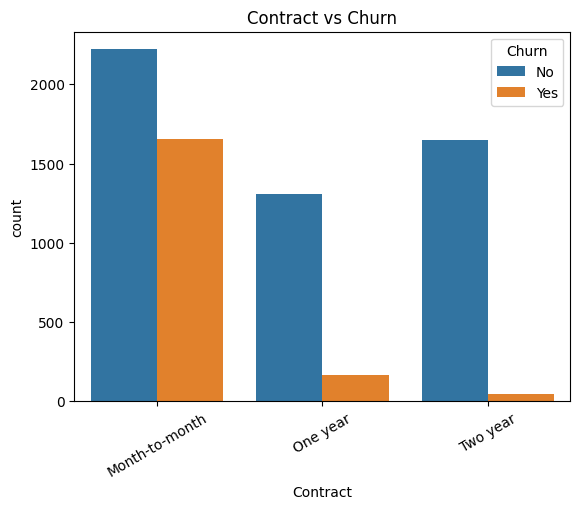

In [115]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract vs Churn")
plt.xticks(rotation=30)
plt.show()

El gráfico muestra que:

- Los clientes con contrato **Month-to-month** tienen la mayor proporción de abandono (Churn = Yes).  
  Esto confirma que los contratos mensuales están fuertemente asociados al churn.
- En los contratos de **One year** y **Two year**, el churn es mucho menor.  
  Especialmente en **Two year**, casi todos los clientes permanecen en la compañía.
- La diferencia es tan marcada que el tipo de contrato es uno de los predictores más poderosos de abandono.

📌 **Insight clave:**  
Los contratos de mayor duración actúan como un factor de retención.  
La empresa podría incentivar a clientes con contratos mensuales a migrar hacia planes de 1 o 2 años mediante **descuentos, beneficios o promociones**, reduciendo así la tasa de churn.

### Método de pago vs Churn

El método de pago (`PaymentMethod`) apareció como variable importante en correlaciones.  
Se sospecha que clientes con **Electronic Check** presentan más churn.  
El gráfico mostrará si efectivamente algunos métodos están asociados a mayor abandono.

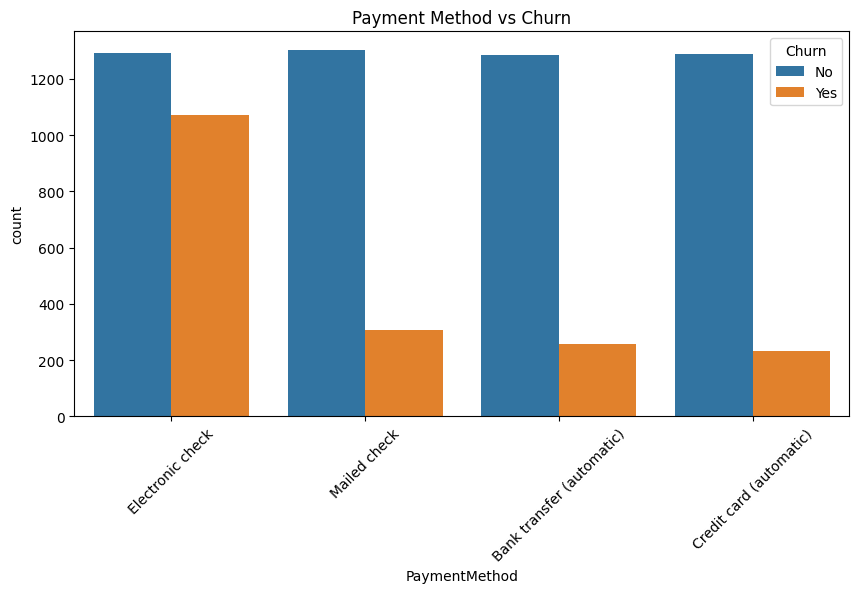

In [118]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()

El gráfico muestra que:

- Los clientes que pagan con **Electronic Check** presentan un nivel de churn 
  significativamente más alto en comparación con los demás métodos de pago.
- En contraste, los métodos **automáticos** (Bank transfer, Credit card) 
  tienen un churn mucho menor.
- El pago con **Mailed check** también está asociado a menor churn que el 
  Electronic Check, aunque ligeramente más alto que los métodos automáticos.

📌 **Insight clave:**  
El método de pago es un factor de riesgo importante.  
Los clientes que utilizan **Electronic Check** tienen más probabilidad de abandonar, 
lo que sugiere que la empresa podría incentivar a estos clientes a migrar hacia 
métodos automáticos mediante **bonificaciones o facilidades**.

### Internet Service vs Churn

`InternetService` (DSL, Fiber optic, None) también mostró asociación.  
Hipótesis: los clientes con fibra óptica podrían tener más churn (quizá por costo).  
Este gráfico permite visualizar qué tipo de servicio de internet está más vinculado a abandono.

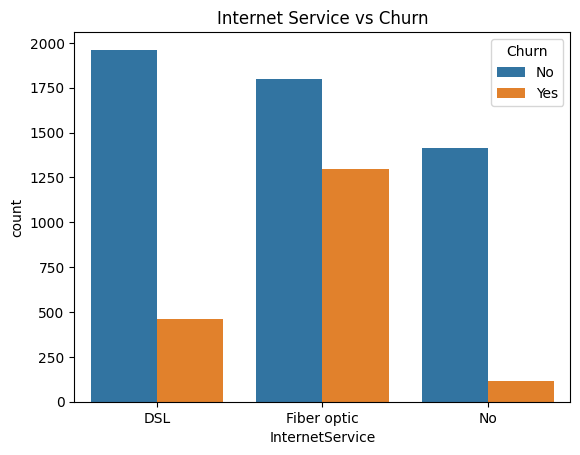

In [121]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Internet Service vs Churn")
plt.show()

El gráfico muestra que:

- Los clientes con **Fiber optic** tienen un nivel de churn considerablemente más alto 
  que los que usan DSL o no tienen servicio de internet.
- Los clientes con **DSL** presentan un churn mucho menor, lo que sugiere 
  que están más satisfechos o que el servicio es más estable en relación al costo.
- Los clientes sin servicio de internet (`No`) también tienen bajo churn, lo cual es lógico 
  porque probablemente contratan menos servicios y, por ende, permanecen estables.

📌 **Insight clave:**  
El tipo de servicio de internet es un factor determinante en el churn.  
Los clientes con **Fiber optic** muestran mayor insatisfacción o sensibilidad al precio, 
por lo que se recomienda analizar estrategias de retención para este segmento:  
descuentos, bundles de servicios o mayor soporte técnico.

### Monthly Charges vs Churn

`MonthlyCharges` es una de las variables numéricas más importantes.  
Correlación positiva: a mayor monto mensual, mayor churn.  
Un boxplot permite ver si los clientes que pagan más al mes tienden a irse.


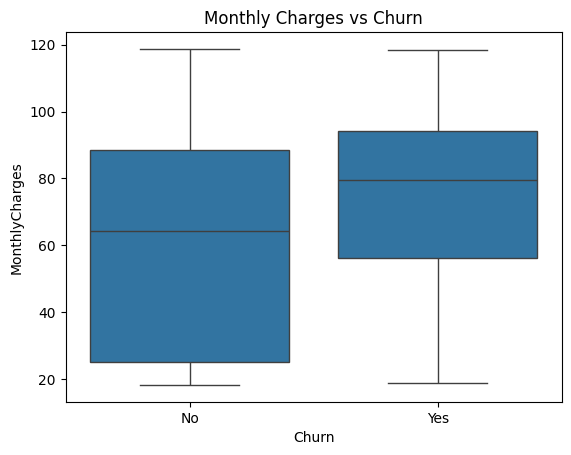

In [124]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

El boxplot muestra que:

- Los clientes que **se van** (`Churn = Yes`) tienen cargos mensuales
  (`MonthlyCharges`) notablemente más altos, con una mediana cercana a **80 USD**.
- Los clientes que **se quedan** (`Churn = No`) presentan una mediana más baja,
  alrededor de **65 USD**, y además una mayor dispersión hacia cargos bajos.
- Existen clientes con cargos muy altos que permanecen, pero son minoría (outliers).

📌 **Insight clave:**  
Los cargos mensuales elevados están asociados a mayor churn.  
Esto indica que los clientes con facturas altas podrían sentirse menos satisfechos 
o percibir menor valor por el precio.  

👉 Estrategia de negocio: diseñar **programas de fidelización, descuentos o bundles de servicios** 
para clientes con cargos altos, con el fin de reducir la tasa de abandono.

### Total Charges vs Churn

`TotalCharges` está muy relacionado con `tenure`, pero igualmente es útil.  
Correlación negativa: clientes con cargos acumulados más altos suelen quedarse.  
El gráfico mostrará si efectivamente los clientes con más facturación total presentan menor churn.

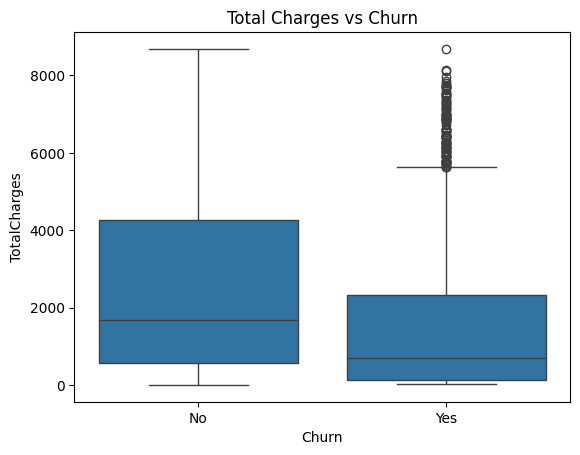

In [127]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")
plt.show()

El boxplot muestra que:

- Los clientes que **se quedan** (`Churn = No`) presentan valores de `TotalCharges`
  mucho más altos, con una mediana superior a **1,600 USD** y un rango amplio
  que llega hasta más de 8,000 USD.
- En contraste, los clientes que **se van** (`Churn = Yes`) tienen en general 
  `TotalCharges` bajos, con una mediana alrededor de **500–600 USD**.
- Esto se debe a que `TotalCharges` está fuertemente relacionado con el `tenure`:
  los clientes que han permanecido más tiempo acumulan más cargos y es menos probable que se vayan.
- Se observan algunos outliers de churn con cargos totales muy altos, pero son minoría.

📌 **Insight clave:**  
Los clientes con **cargos acumulados bajos** (normalmente porque son nuevos) 
tienen mayor probabilidad de churn.  
Esto refuerza el hallazgo anterior: la retención debe enfocarse en clientes recientes 
para evitar que abandonen en los primeros meses.

## Conclusión del EDA

Tras el análisis exploratorio podemos resumir que:

- Existe un **desbalance de clases**: el 73% de los clientes permanece y el 27% abandona.  
- El **tenure** es clave: los clientes nuevos (tenure bajo) tienen alta probabilidad de churn.  
- El **tipo de contrato** marca una diferencia fuerte: los contratos mes a mes concentran la mayoría del churn, mientras que los de 1 o 2 años casi no presentan abandono.  
- El **método de pago** influye: quienes usan *Electronic Check* se van más que quienes usan métodos automáticos.  
- El **tipo de internet** también importa: los clientes con fibra óptica tienen más churn que los de DSL o los que no tienen internet.  
- **Cargos mensuales altos** se asocian a más abandono, mientras que **cargos totales bajos** (clientes recientes) también muestran mayor churn.  

📌 **Insight clave:**  
El churn ocurre principalmente en clientes **nuevos, con contratos mensuales, con pagos electrónicos y con cargos mensuales altos**.  
Esto define dónde enfocar las estrategias de retención.


# Definición Estrategia

## 1. Preprocesamiento
- Eliminar `customerID`.
- Imputar valores nulos (`TotalCharges` en clientes con tenure=0 → reemplazado por 0).
- Convertir variables categóricas a numéricas con **Label Encoding** (manteniendo nombres originales).
- Escalar variables numéricas (`MonthlyCharges`, `TotalCharges`, `tenure`) para modelos sensibles.
- Manejar el desbalance:
  - Comparar **class_weight="balanced"** vs **SMOTE**.
- Dividir dataset en **train/test (80/20)** y aplicar **validación cruzada k-fold**.

## 2. Métricas de Evaluación
### F1-Score (clase positiva = Yes)
- Balancea precisión y recall en la clase minoritaria (churners). Útil para datasets desbalanceados.

### Precision
- Mide qué porcentaje de los clientes que etiquetamos como churn realmente lo son. Importante si las campañas de retención son costosas.

### Recall (Sensibilidad)
- Mide qué porcentaje de churners reales logramos detectar. Priorizamos recall para no perder clientes valiosos que se van.

### Matriz de confusión
- Permite una lectura operativa de errores: FP = clientes contactados innecesariamente, FN = clientes que se pierden por no haber sido detectados.

### ROC-AUC y PR-AUC
- Miden la capacidad del modelo para rankear correctamente. PR-AUC es más relevante dado el desbalance.

## 3. Modelos a Comparar
- **Modelos base e interpretables**:
  - Regresión Logística
  - Árbol de Decisión
- **Modelos más robustos (caja negra)**:
  - Random Forest
  - XGBoost
  - SVM (kernel RBF)
- **Técnicas adicionales**:
  - PCA para reducción de dimensionalidad (si es necesario).
  - Comparación entre **SMOTE vs class_weight** para manejo de desbalance.
- **Explicabilidad (XAI)**:
  - SHAP values (para impacto individual de variables).
  - Permutation Importance (ranking global).
  - Árbol surrogate (aproximación interpretable de modelos complejos).

---

# Justificación de la Estrategia

- **Por qué estas métricas**:  
  - El dataset está desbalanceado; accuracy no refleja el desempeño real.  
  - El F1-score y el Recall para churn son más relevantes porque el negocio necesita identificar clientes en riesgo, incluso si eso genera algunos falsos positivos.  
  - ROC-AUC complementa para evaluar el poder discriminativo global.

- **Por qué este preprocesamiento**:  
  - Label Encoding mantiene consistencia de nombres y simplifica correlaciones.  
  - Escalar variables asegura correcto desempeño en modelos lineales y SVM.  
  - Comparar **SMOTE vs class_weight** permite elegir entre equilibrar los datos o ajustar la función de pérdida del modelo.  

- **Por qué estos modelos**:  
  - Regresión Logística y Árbol de Decisión → fáciles de interpretar, sirven como línea base.  
  - Random Forest y XGBoost → capturan relaciones no lineales y suelen lograr mejor desempeño en problemas de churn.  
  - SVM → añade otra perspectiva robusta, aunque menos interpretable.  

- **Por qué XAI**:  
  Abrir la caja negra es esencial. SHAP y Permutation Importance permitirán explicar qué variables influyen en cada predicción, algo crucial para que la empresa diseñe estrategias de retención.  

---

## Conclusión
La estrategia equilibra **precisión y explicabilidad**:  
- Modelos simples para baseline y comunicación clara.  
- Modelos complejos para maximizar desempeño.  
- XAI para traducir resultados en **acciones concretas de negocio**.  

Esto asegura que no solo se prediga quién se irá, sino **por qué**, y qué se puede hacer para retenerlo.


# 🔨 Implementación

## Imports y configuración

In [40]:
# !pip install scikit-learn xgboost shap imbalanced-learn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    precision_recall_curve, auc, confusion_matrix
)
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
import shap

ImportError: cannot import name '_fit_context' from 'sklearn.base' (/root/venv/lib/python3.10/site-packages/sklearn/base.py)

## Carga y limpieza de datos

In [ ]:
filename = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(filename)
print("Forma original:", df.shape)
display(df.head())

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = pd.tonumeric(df['TotalCharges'], erros='coerce').fillna(0.0)
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])
df['Churn'] = df['Charn'].map({'Yes': 1, 'No': 0})

for c in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    if c in df.columns:
        df[c] = df[c].replace({'No internet service': 'No'})

if 'MultipleLines' in df.columns:
    df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

print("Después de limpiar:", df.shape)
display(df.head)

## Separación de características y conjuntos

## Preprocesamiento y modelos

## Evaluación de modelos

## Visualización

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdac7b35-2e62-4f7a-a30d-99f1636433c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>